In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

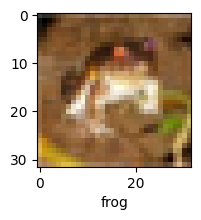

In [9]:
plot_sample(X_train, y_train, 0)

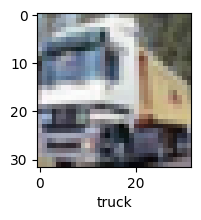

In [10]:
plot_sample(X_train, y_train, 1)

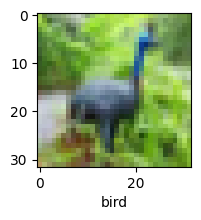

In [11]:
plot_sample(X_train, y_train, 6)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 7ms/step - loss: 1.8115 - accuracy: 0.3558
Epoch 2/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6222 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5410 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4804 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4318 - accuracy: 0.4966


In [14]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4718 - accuracy: 0.4676


[1.471788763999939, 0.4675999879837036]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.54      0.57      1000
           1       0.55      0.70      0.62      1000
           2       0.47      0.20      0.28      1000
           3       0.36      0.14      0.20      1000
           4       0.45      0.37      0.41      1000
           5       0.27      0.65      0.38      1000
           6       0.61      0.37      0.46      1000
           7       0.56      0.53      0.55      1000
           8       0.69      0.52      0.59      1000
           9       0.45      0.67      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [16]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [17]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.4325 - accuracy: 0.4858
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0972 - accuracy: 0.6166
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9709 - accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8886 - accuracy: 0.6916
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8205 - accuracy: 0.7153
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7670 - accuracy: 0.7348
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7166 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6770 - accuracy: 0.7634
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6381 - accuracy: 0.7781
Epoch 10/10
1563/1563 [==============================] - 18s 11m

In [19]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9833 - accuracy: 0.6868


[0.9833179712295532, 0.6868000030517578]

In [20]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

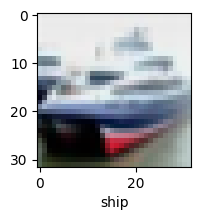

In [21]:
plot_sample(X_test, y_test, 1)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[1.56142481e-03, 3.34517070e-04, 1.70127256e-03, 9.78583097e-01,
        1.22237863e-04, 1.52960187e-02, 9.12782736e-04, 1.64282319e-05,
        1.46667613e-03, 5.53243535e-06],
       [1.34163638e-04, 1.06829368e-02, 4.15287751e-08, 1.86540731e-07,
        9.63214664e-12, 1.25941702e-10, 4.81838840e-11, 2.34724610e-12,
        9.89179730e-01, 2.97150473e-06],
       [2.15011332e-02, 1.66786574e-02, 7.33069086e-04, 6.81854610e-04,
        6.64895852e-05, 1.14663835e-05, 6.95292692e-05, 1.16712658e-03,
        9.58105922e-01, 9.84744867e-04],
       [5.23036361e-01, 2.36749393e-03, 1.08073577e-02, 8.71988712e-04,
        1.35497530e-05, 8.52188350e-06, 1.81765339e-04, 3.18214745e-07,
        4.62704927e-01, 7.68066457e-06],
       [3.31098672e-05, 1.12648981e-04, 2.41484996e-02, 1.15839049e-01,
        1.45329356e-01, 1.91204355e-03, 7.12585449e-01, 1.19776269e-06,
        3.73310904e-05, 1.33037975e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

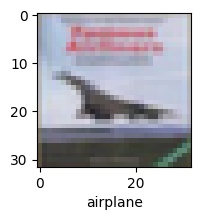

In [25]:
plot_sample(X_test, y_test, 3)

In [26]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
print("Classification report : \n", classification_report(y_test, y_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.66      0.79      0.72      1000
           1       0.64      0.92      0.76      1000
           2       0.63      0.54      0.58      1000
           3       0.50      0.58      0.54      1000
           4       0.68      0.60      0.64      1000
           5       0.65      0.52      0.58      1000
           6       0.81      0.72      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.82      0.79      0.81      1000
           9       0.88      0.63      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

